In [2]:
import warnings as En_Offen_span__w
En_Offen_span__w.filterwarnings("ignore")
import pandas as En_Offen_span__N

In [3]:
####### Spanish offensive language
En_Offen_span_1 = En_Offen_span__N.read_csv('Spanish_final.csv')
En_Offen_span_1

,tweet a etiquetar,hate speech/estereotipo
0,tan tan feminista invisibilizaban constantemen...,0.0
1,eneatipo cooperativa karina ol carga q convirt...,0.0
2,sabr n femiorca karina ol flaiterio mapuchento...,1.0
3,antodellaw jonaoval carolinaleitao penalolen v...,0.0
4,ciudadanolevi debajo piedra flaiterio,0.0
...,...,...
9522,tere marinov toda raz n sra marinov hoy femini...,1.0
9523,anariagrando andreaenlaruta clintjoselint ver ...,0.0
9524,feminista tan agresor dan risa verdad asco con...,0.0
9525,machinet feminista dicen colega karina oliva,0.0


In [4]:
En_Offen_span_1['hate speech/estereotipo'].value_counts()

0.0    8919
1.0     608
Name: hate speech/estereotipo, dtype: int64

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer as En_Offen_span_1tf

En_Offen_span_1zer = En_Offen_span_1tf(analyzer='word', ngram_range= (1,1))
En_Offen_span_1x = En_Offen_span_1zer.fit_transform(En_Offen_span_1['tweet a etiquetar'].values.astype('U')).toarray()

In [6]:
En_Offen_span_1x.shape

(9527, 26680)

In [7]:
En_Offen_span_1y = En_Offen_span_1['hate speech/estereotipo']

In [8]:
import imblearn
from imblearn.under_sampling import RandomUnderSampler as En_Offen_span_1run
from collections import Counter as En_Offen_span_1cn
print('Original En_Offen_span_1 datashape %s' % En_Offen_span_1cn(En_Offen_span_1y))
En_Offen_span_1ml = En_Offen_span_1run()
En_Offen_span_1x, En_Offen_span_1y = En_Offen_span_1ml.fit_resample(En_Offen_span_1x, En_Offen_span_1y)
print('Resampled En_Offen_span_1 datashape %s' % En_Offen_span_1cn(En_Offen_span_1y))


Original En_Offen_span_1 datashape Counter({0.0: 8919, 1.0: 608})
Resampled En_Offen_span_1 datashape Counter({0.0: 608, 1.0: 608})


In [9]:
En_Offen_span_1x.shape

(1216, 26680)

In [10]:
En_Offen_span_1y.shape

(1216,)

In [11]:
from sklearn.model_selection import train_test_split as En_Offen_span_1trs

En_tssi =0.4
En_rast = 40
En_tssi1 =0.5

En_Offen_span_1xr, En_Offen_span_1xe, En_Offen_span_1yr, En_Offen_span_1ye = En_Offen_span_1trs(En_Offen_span_1x, En_Offen_span_1y, test_size=En_tssi, random_state= En_rast)
En_Offen_span_1xd, En_Offen_span_1xe, En_Offen_span_1yd, En_Offen_span_1ye = En_Offen_span_1trs(En_Offen_span_1xe, En_Offen_span_1ye, test_size= En_tssi1, random_state= En_rast)

print(En_Offen_span_1xr.shape)
print(En_Offen_span_1xd.shape)
print(En_Offen_span_1xe.shape)

(729, 26680)
(243, 26680)
(244, 26680)


### ML algorithm

In [12]:
from sklearn.metrics import classification_report as En_Offen_span_1cffr
from sklearn.metrics import confusion_matrix as En_Offen_span_1cfmt
from sklearn.metrics import ConfusionMatrixDisplay as En_Offen_span_1cmxd
from sklearn.model_selection import GridSearchCV as En_Offen_span_1grdsh
import time as En_Offen_span_1tiim

#### decision tree

In [13]:
from sklearn.tree import DecisionTreeClassifier as En_Offen_span_1dsne

En_Hypm = { 'max_features': ['log2','sqrt',None],
               'criterion': ['entropy','gini','log_loss'],
               'splitter':['best','random']}


En_Hypm_vsb = En_Offen_span_1dsne(random_state= En_rast)
En_Hypm_vsb = En_Offen_span_1grdsh(En_Hypm_vsb, En_Hypm,
                          cv=2, verbose=10)
En_Hypm_vsb.fit(En_Offen_span_1xr[:500], En_Offen_span_1yr[:500])

print(En_Hypm_vsb.best_params_)
print("score-En_Offen_span_1: ", En_Hypm_vsb.best_score_)

Fitting 2 folds for each of 18 candidates, totalling 36 fits
[CV 1/2; 1/18] START criterion=entropy, max_features=log2, splitter=best........
[CV 1/2; 1/18] END criterion=entropy, max_features=log2, splitter=best;, score=0.564 total time=   0.1s
[CV 2/2; 1/18] START criterion=entropy, max_features=log2, splitter=best........
[CV 2/2; 1/18] END criterion=entropy, max_features=log2, splitter=best;, score=0.488 total time=   0.1s
[CV 1/2; 2/18] START criterion=entropy, max_features=log2, splitter=random......
[CV 1/2; 2/18] END criterion=entropy, max_features=log2, splitter=random;, score=0.636 total time=   0.1s
[CV 2/2; 2/18] START criterion=entropy, max_features=log2, splitter=random......
[CV 2/2; 2/18] END criterion=entropy, max_features=log2, splitter=random;, score=0.552 total time=   0.2s
[CV 1/2; 3/18] START criterion=entropy, max_features=sqrt, splitter=best........
[CV 1/2; 3/18] END criterion=entropy, max_features=sqrt, splitter=best;, score=0.604 total time=   0.2s
[CV 2/2; 3


 training duration: 2.8975014686584473 

              precision    recall  f1-score   support

         0.0       0.70      0.77      0.73       127
         1.0       0.72      0.63      0.67       116

    accuracy                           0.70       243
   macro avg       0.71      0.70      0.70       243
weighted avg       0.70      0.70      0.70       243


 validation duration: 0.19192957878112793 



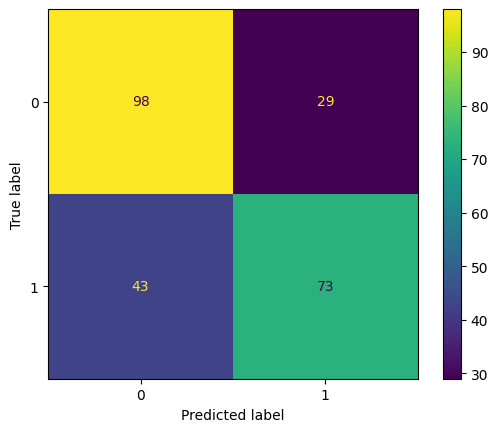

In [14]:
En_pd1 = En_Offen_span_1tiim.time()

En_Offen_span_MdA= En_Offen_span_1dsne(**En_Hypm_vsb.best_params_)
En_Offen_span_MdA.fit(En_Offen_span_1xr, En_Offen_span_1yr)

En_pd2 = En_Offen_span_1tiim.time()
print("\n training duration:", En_pd2-En_pd1,"\n")


En_pd1 = En_Offen_span_1tiim.time()

En_Offen_span_pct= En_Offen_span_MdA.predict(En_Offen_span_1xd)

print(En_Offen_span_1cffr(En_Offen_span_1yd, En_Offen_span_pct))

En_tk = En_Offen_span_1cfmt(En_Offen_span_1yd,En_Offen_span_pct)
En_rd = En_Offen_span_1cmxd(confusion_matrix = En_tk, display_labels = [0,1])
En_rd.plot()

En_pd2= En_Offen_span_1tiim.time()
print("\n validation duration:", En_pd2-En_pd1,"\n")

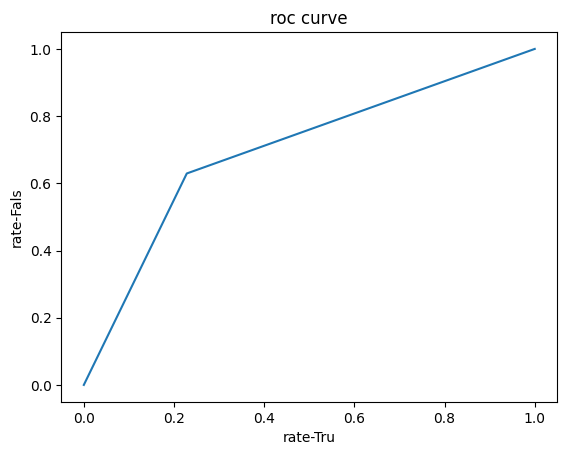

auc- curve: 0.7004819440673364


In [15]:
from sklearn.metrics import roc_curve as En_Offen_span_rc
from sklearn.metrics import roc_auc_score as En_Offen_span_ac
import matplotlib.pyplot as En_Offen_span_mt

En_Offen_span_Fals, En_Offen_span_tre, En_Offen_span_ths = En_Offen_span_rc(En_Offen_span_1yd, En_Offen_span_pct)
En_Offen_span_mt.plot(En_Offen_span_Fals, En_Offen_span_tre)
En_Offen_span_mt.ylabel('rate-Fals')
En_Offen_span_mt.xlabel('rate-Tru')
En_Offen_span_mt.title('roc curve')
En_Offen_span_mt.show()
print('auc- curve:', En_Offen_span_ac(En_Offen_span_1yd, En_Offen_span_pct))

              precision    recall  f1-score   support

         0.0       0.65      0.68      0.66       118
         1.0       0.69      0.66      0.67       126

    accuracy                           0.67       244
   macro avg       0.67      0.67      0.67       244
weighted avg       0.67      0.67      0.67       244


 testing duration: 0.12471342086791992 



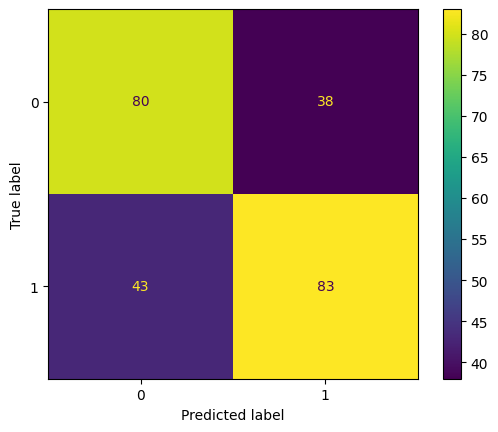

In [16]:
En_pd1 = En_Offen_span_1tiim.time()

En_Offen_span_pct= En_Offen_span_MdA.predict(En_Offen_span_1xe)

print(En_Offen_span_1cffr(En_Offen_span_1ye, En_Offen_span_pct))

En_tk = En_Offen_span_1cfmt(En_Offen_span_1ye,En_Offen_span_pct)
En_rd = En_Offen_span_1cmxd(confusion_matrix = En_tk, display_labels = [0,1])
En_rd.plot()

En_pd2= En_Offen_span_1tiim.time()
print("\n testing duration:", En_pd2-En_pd1,"\n")

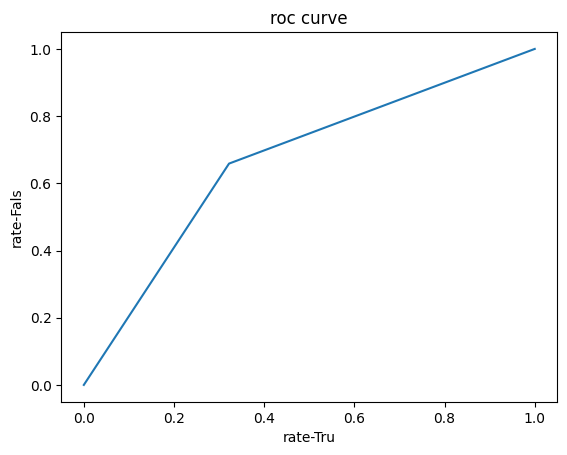

auc- curve: 0.6683481302125369


In [17]:
En_Offen_span_Fals, En_Offen_span_tre, En_Offen_span_ths = En_Offen_span_rc(En_Offen_span_1ye, En_Offen_span_pct)
En_Offen_span_mt.plot(En_Offen_span_Fals, En_Offen_span_tre)
En_Offen_span_mt.ylabel('rate-Fals')
En_Offen_span_mt.xlabel('rate-Tru')
En_Offen_span_mt.title('roc curve')
En_Offen_span_mt.show()
print('auc- curve:', En_Offen_span_ac(En_Offen_span_1ye, En_Offen_span_pct))

#### SVM

In [18]:
from sklearn.svm import SVC as En_Offen_span_1spv

En_Hypm = { 'kernel': ['sigmoid','poly','rbg','linear'],
               'gamma': ['auto','scale'],
               'degree':[2,3,4,5,6,7]}


En_Hypm_vsb = En_Offen_span_1spv(random_state= En_rast)
En_Hypm_vsb = En_Offen_span_1grdsh(En_Hypm_vsb, En_Hypm,
                          cv=2, verbose=10)
En_Hypm_vsb.fit(En_Offen_span_1xr[:500], En_Offen_span_1yr[:500])

print(En_Hypm_vsb.best_params_)
print("score-En_Offen_span_1: ", En_Hypm_vsb.best_score_)

Fitting 2 folds for each of 48 candidates, totalling 96 fits
[CV 1/2; 1/48] START degree=2, gamma=auto, kernel=sigmoid.......................
[CV 1/2; 1/48] END degree=2, gamma=auto, kernel=sigmoid;, score=0.588 total time=   6.2s
[CV 2/2; 1/48] START degree=2, gamma=auto, kernel=sigmoid.......................
[CV 2/2; 1/48] END degree=2, gamma=auto, kernel=sigmoid;, score=0.500 total time=   6.7s
[CV 1/2; 2/48] START degree=2, gamma=auto, kernel=poly..........................
[CV 1/2; 2/48] END degree=2, gamma=auto, kernel=poly;, score=0.492 total time=   5.0s
[CV 2/2; 2/48] START degree=2, gamma=auto, kernel=poly..........................
[CV 2/2; 2/48] END degree=2, gamma=auto, kernel=poly;, score=0.500 total time=   6.3s
[CV 1/2; 3/48] START degree=2, gamma=auto, kernel=rbg...........................
[CV 1/2; 3/48] END degree=2, gamma=auto, kernel=rbg;, score=nan total time=   0.0s
[CV 2/2; 3/48] START degree=2, gamma=auto, kernel=rbg...........................
[CV 2/2; 3/48] END d


 training duration: 11.965814352035522 

              precision    recall  f1-score   support

         0.0       0.74      0.75      0.74       127
         1.0       0.72      0.71      0.71       116

    accuracy                           0.73       243
   macro avg       0.73      0.73      0.73       243
weighted avg       0.73      0.73      0.73       243


 validation duration: 4.0203211307525635 



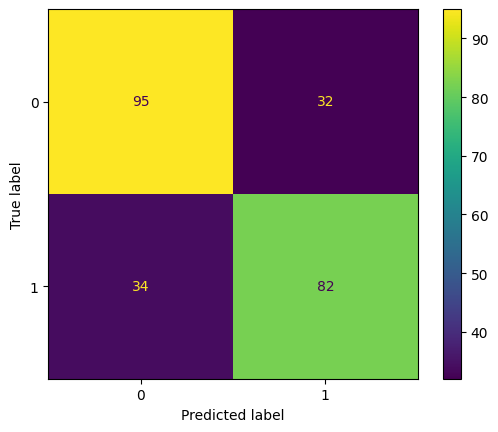

In [19]:
En_pd1 = En_Offen_span_1tiim.time()

En_Offen_span_MdB= En_Offen_span_1spv(**En_Hypm_vsb.best_params_)
En_Offen_span_MdB.fit(En_Offen_span_1xr, En_Offen_span_1yr)

En_pd2 = En_Offen_span_1tiim.time()
print("\n training duration:", En_pd2-En_pd1,"\n")


En_pd1 = En_Offen_span_1tiim.time()

En_Offen_span_pct= En_Offen_span_MdB.predict(En_Offen_span_1xd)

print(En_Offen_span_1cffr(En_Offen_span_1yd, En_Offen_span_pct))

En_tk = En_Offen_span_1cfmt(En_Offen_span_1yd,En_Offen_span_pct)
En_rd = En_Offen_span_1cmxd(confusion_matrix = En_tk, display_labels = [0,1])
En_rd.plot()

En_pd2= En_Offen_span_1tiim.time()
print("\n validation duration:", En_pd2-En_pd1,"\n")

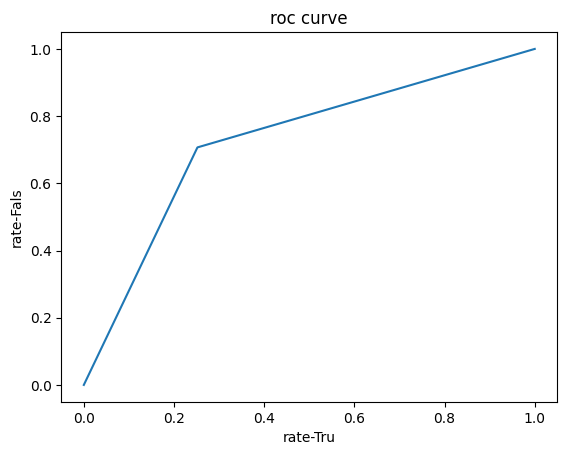

auc- curve: 0.727464023893565


In [20]:
En_Offen_span_Fals, En_Offen_span_tre, En_Offen_span_ths = En_Offen_span_rc(En_Offen_span_1yd, En_Offen_span_pct)
En_Offen_span_mt.plot(En_Offen_span_Fals, En_Offen_span_tre)
En_Offen_span_mt.ylabel('rate-Fals')
En_Offen_span_mt.xlabel('rate-Tru')
En_Offen_span_mt.title('roc curve')
En_Offen_span_mt.show()
print('auc- curve:', En_Offen_span_ac(En_Offen_span_1yd, En_Offen_span_pct))

              precision    recall  f1-score   support

         0.0       0.80      0.69      0.74       118
         1.0       0.74      0.83      0.79       126

    accuracy                           0.77       244
   macro avg       0.77      0.76      0.76       244
weighted avg       0.77      0.77      0.77       244


 testing duration: 3.1944594383239746 



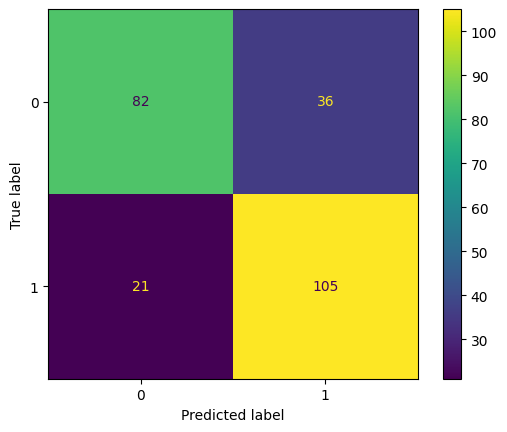

In [21]:
En_pd1 = En_Offen_span_1tiim.time()

En_Offen_span_pct= En_Offen_span_MdB.predict(En_Offen_span_1xe)

print(En_Offen_span_1cffr(En_Offen_span_1ye, En_Offen_span_pct))

En_tk = En_Offen_span_1cfmt(En_Offen_span_1ye,En_Offen_span_pct)
En_rd = En_Offen_span_1cmxd(confusion_matrix = En_tk, display_labels = [0,1])
En_rd.plot()

En_pd2= En_Offen_span_1tiim.time()
print("\n testing duration:", En_pd2-En_pd1,"\n")

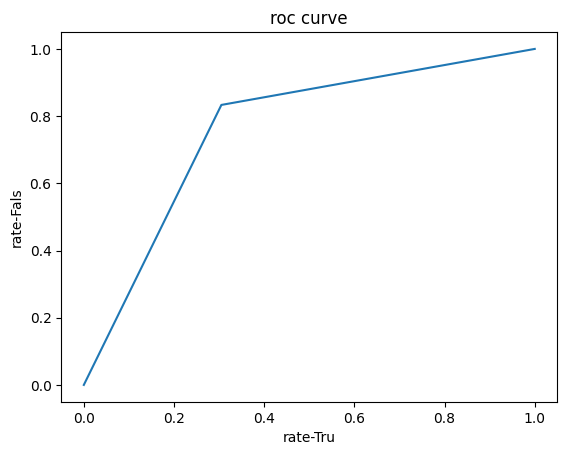

auc- curve: 0.7641242937853107


In [22]:
En_Offen_span_Fals, En_Offen_span_tre, En_Offen_span_ths = En_Offen_span_rc(En_Offen_span_1ye, En_Offen_span_pct)
En_Offen_span_mt.plot(En_Offen_span_Fals, En_Offen_span_tre)
En_Offen_span_mt.ylabel('rate-Fals')
En_Offen_span_mt.xlabel('rate-Tru')
En_Offen_span_mt.title('roc curve')
En_Offen_span_mt.show()
print('auc- curve:', En_Offen_span_ac(En_Offen_span_1ye, En_Offen_span_pct))

#### naïve bayes

In [23]:
from sklearn.naive_bayes import GaussianNB as En_Offen_span_1nvb

En_Hypm = { 'var_smoothing': [1e-9,1e-10,1e-11,1e-12,1e-13]}


En_Hypm_vsb = En_Offen_span_1nvb()
En_Hypm_vsb = En_Offen_span_1grdsh(En_Hypm_vsb, En_Hypm,
                          cv=2, verbose=10)
En_Hypm_vsb.fit(En_Offen_span_1xr[:500], En_Offen_span_1yr[:500])

print(En_Hypm_vsb.best_params_)
print("score-En_Offen_span_1: ", En_Hypm_vsb.best_score_)

Fitting 2 folds for each of 5 candidates, totalling 10 fits
[CV 1/2; 1/5] START var_smoothing=1e-09.........................................
[CV 1/2; 1/5] END ..........var_smoothing=1e-09;, score=0.660 total time=   0.2s
[CV 2/2; 1/5] START var_smoothing=1e-09.........................................
[CV 2/2; 1/5] END ..........var_smoothing=1e-09;, score=0.624 total time=   0.2s
[CV 1/2; 2/5] START var_smoothing=1e-10.........................................
[CV 1/2; 2/5] END ..........var_smoothing=1e-10;, score=0.660 total time=   0.2s
[CV 2/2; 2/5] START var_smoothing=1e-10.........................................
[CV 2/2; 2/5] END ..........var_smoothing=1e-10;, score=0.624 total time=   0.2s
[CV 1/2; 3/5] START var_smoothing=1e-11.........................................
[CV 1/2; 3/5] END ..........var_smoothing=1e-11;, score=0.660 total time=   0.2s
[CV 2/2; 3/5] START var_smoothing=1e-11.........................................
[CV 2/2; 3/5] END ..........var_smoothing=1e-11;,


 training duration: 0.34493184089660645 

              precision    recall  f1-score   support

         0.0       0.62      0.54      0.58       127
         1.0       0.56      0.65      0.60       116

    accuracy                           0.59       243
   macro avg       0.59      0.59      0.59       243
weighted avg       0.59      0.59      0.59       243


 validation duration: 0.1770625114440918 



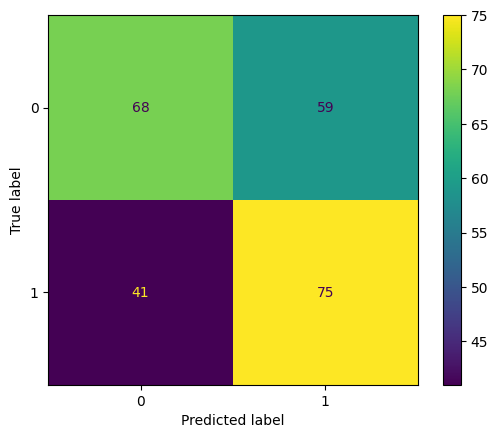

In [24]:
En_pd1 = En_Offen_span_1tiim.time()

En_Offen_span_MdC= En_Offen_span_1nvb(**En_Hypm_vsb.best_params_)
En_Offen_span_MdC.fit(En_Offen_span_1xr, En_Offen_span_1yr)

En_pd2 = En_Offen_span_1tiim.time()
print("\n training duration:", En_pd2-En_pd1,"\n")


En_pd1 = En_Offen_span_1tiim.time()

En_Offen_span_pct= En_Offen_span_MdC.predict(En_Offen_span_1xd)

print(En_Offen_span_1cffr(En_Offen_span_1yd, En_Offen_span_pct))

En_tk = En_Offen_span_1cfmt(En_Offen_span_1yd,En_Offen_span_pct)
En_rd = En_Offen_span_1cmxd(confusion_matrix = En_tk, display_labels = [0,1])
En_rd.plot()

En_pd2= En_Offen_span_1tiim.time()
print("\n validation duration:", En_pd2-En_pd1,"\n")

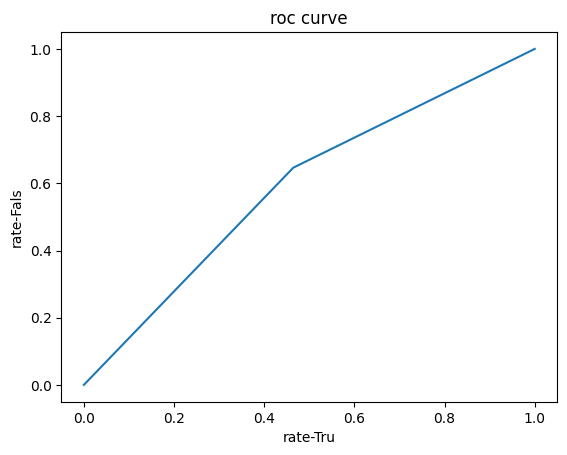

auc- curve: 0.5909923975020364


In [25]:
En_Offen_span_Fals, En_Offen_span_tre, En_Offen_span_ths = En_Offen_span_rc(En_Offen_span_1yd, En_Offen_span_pct)
En_Offen_span_mt.plot(En_Offen_span_Fals, En_Offen_span_tre)
En_Offen_span_mt.ylabel('rate-Fals')
En_Offen_span_mt.xlabel('rate-Tru')
En_Offen_span_mt.title('roc curve')
En_Offen_span_mt.show()
print('auc- curve:', En_Offen_span_ac(En_Offen_span_1yd, En_Offen_span_pct))

              precision    recall  f1-score   support

         0.0       0.67      0.49      0.57       118
         1.0       0.62      0.77      0.69       126

    accuracy                           0.64       244
   macro avg       0.64      0.63      0.63       244
weighted avg       0.64      0.64      0.63       244


 testing duration: 0.2080683708190918 



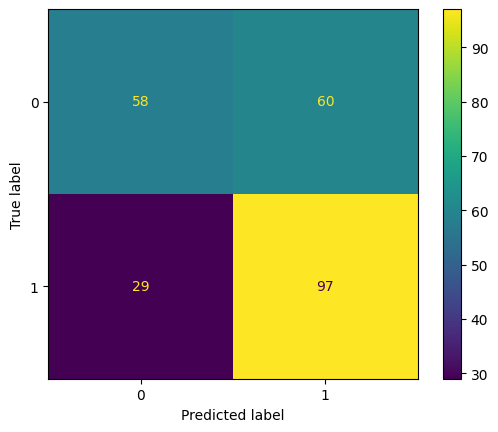

In [26]:
En_pd1 = En_Offen_span_1tiim.time()

En_Offen_span_pct= En_Offen_span_MdC.predict(En_Offen_span_1xe)

print(En_Offen_span_1cffr(En_Offen_span_1ye, En_Offen_span_pct))

En_tk = En_Offen_span_1cfmt(En_Offen_span_1ye,En_Offen_span_pct)
En_rd = En_Offen_span_1cmxd(confusion_matrix = En_tk, display_labels = [0,1])
En_rd.plot()

En_pd2= En_Offen_span_1tiim.time()
print("\n testing duration:", En_pd2-En_pd1,"\n")

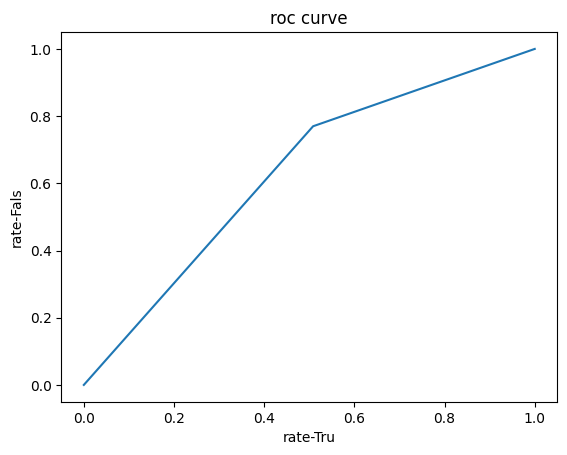

auc- curve: 0.6306833467850417


In [27]:
En_Offen_span_Fals, En_Offen_span_tre, En_Offen_span_ths = En_Offen_span_rc(En_Offen_span_1ye, En_Offen_span_pct)
En_Offen_span_mt.plot(En_Offen_span_Fals, En_Offen_span_tre)
En_Offen_span_mt.ylabel('rate-Fals')
En_Offen_span_mt.xlabel('rate-Tru')
En_Offen_span_mt.title('roc curve')
En_Offen_span_mt.show()
print('auc- curve:', En_Offen_span_ac(En_Offen_span_1ye, En_Offen_span_pct))

#### Adaboost

In [28]:
from sklearn.ensemble import AdaBoostClassifier as En_Offen_span_1ads

En_Hypm = { 'algorithm': ['SAMME.R','SAMME'],
               'learning_rate': [1.0,2.0,3.0,4.0,5.0],
               'n_estimators':[40,50,60,70,80]}


En_Hypm_vsb = En_Offen_span_1ads(random_state= En_rast)
En_Hypm_vsb = En_Offen_span_1grdsh(En_Hypm_vsb, En_Hypm,
                          cv=2, verbose=10)
En_Hypm_vsb.fit(En_Offen_span_1xr[:500], En_Offen_span_1yr[:500])

print(En_Hypm_vsb.best_params_)
print("score-En_Offen_span_1: ", En_Hypm_vsb.best_score_)

Fitting 2 folds for each of 50 candidates, totalling 100 fits
[CV 1/2; 1/50] START algorithm=SAMME.R, learning_rate=1.0, n_estimators=40......
[CV 1/2; 1/50] END algorithm=SAMME.R, learning_rate=1.0, n_estimators=40;, score=0.728 total time=   3.6s
[CV 2/2; 1/50] START algorithm=SAMME.R, learning_rate=1.0, n_estimators=40......
[CV 2/2; 1/50] END algorithm=SAMME.R, learning_rate=1.0, n_estimators=40;, score=0.640 total time=   3.2s
[CV 1/2; 2/50] START algorithm=SAMME.R, learning_rate=1.0, n_estimators=50......
[CV 1/2; 2/50] END algorithm=SAMME.R, learning_rate=1.0, n_estimators=50;, score=0.752 total time=   4.4s
[CV 2/2; 2/50] START algorithm=SAMME.R, learning_rate=1.0, n_estimators=50......
[CV 2/2; 2/50] END algorithm=SAMME.R, learning_rate=1.0, n_estimators=50;, score=0.628 total time=   4.9s
[CV 1/2; 3/50] START algorithm=SAMME.R, learning_rate=1.0, n_estimators=60......
[CV 1/2; 3/50] END algorithm=SAMME.R, learning_rate=1.0, n_estimators=60;, score=0.700 total time=   5.1s
[CV


 training duration: 15.758771896362305 

              precision    recall  f1-score   support

         0.0       0.67      0.72      0.69       127
         1.0       0.67      0.60      0.63       116

    accuracy                           0.67       243
   macro avg       0.67      0.66      0.66       243
weighted avg       0.67      0.67      0.67       243


 validation duration: 0.532160758972168 



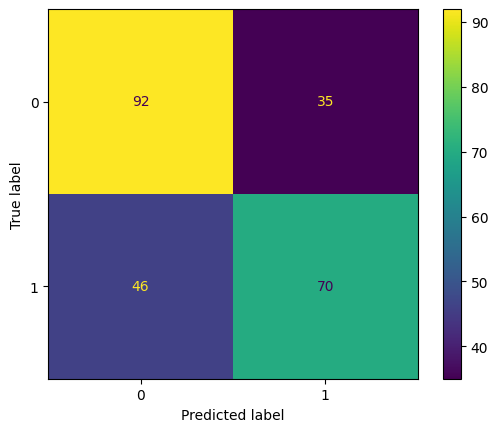

In [29]:
En_pd1 = En_Offen_span_1tiim.time()

En_Offen_span_MdD= En_Offen_span_1ads(**En_Hypm_vsb.best_params_)
En_Offen_span_MdD.fit(En_Offen_span_1xr, En_Offen_span_1yr)

En_pd2 = En_Offen_span_1tiim.time()
print("\n training duration:", En_pd2-En_pd1,"\n")


En_pd1 = En_Offen_span_1tiim.time()

En_Offen_span_pct= En_Offen_span_MdD.predict(En_Offen_span_1xd)

print(En_Offen_span_1cffr(En_Offen_span_1yd, En_Offen_span_pct))

En_tk = En_Offen_span_1cfmt(En_Offen_span_1yd,En_Offen_span_pct)
En_rd = En_Offen_span_1cmxd(confusion_matrix = En_tk, display_labels = [0,1])
En_rd.plot()

En_pd2= En_Offen_span_1tiim.time()
print("\n validation duration:", En_pd2-En_pd1,"\n")

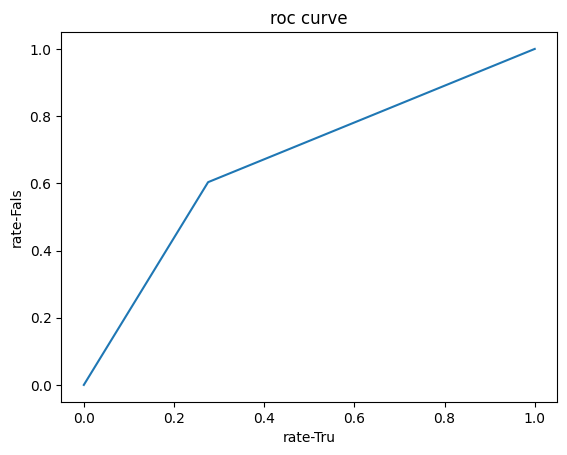

auc- curve: 0.6639288623404833


In [30]:
En_Offen_span_Fals, En_Offen_span_tre, En_Offen_span_ths = En_Offen_span_rc(En_Offen_span_1yd, En_Offen_span_pct)
En_Offen_span_mt.plot(En_Offen_span_Fals, En_Offen_span_tre)
En_Offen_span_mt.ylabel('rate-Fals')
En_Offen_span_mt.xlabel('rate-Tru')
En_Offen_span_mt.title('roc curve')
En_Offen_span_mt.show()
print('auc- curve:', En_Offen_span_ac(En_Offen_span_1yd, En_Offen_span_pct))

              precision    recall  f1-score   support

         0.0       0.70      0.71      0.71       118
         1.0       0.73      0.71      0.72       126

    accuracy                           0.71       244
   macro avg       0.71      0.71      0.71       244
weighted avg       0.71      0.71      0.71       244


 testing duration: 0.5358026027679443 



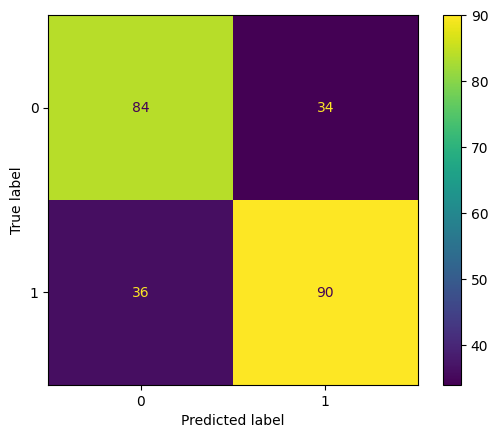

In [31]:
En_pd1 = En_Offen_span_1tiim.time()

En_Offen_span_pct= En_Offen_span_MdD.predict(En_Offen_span_1xe)

print(En_Offen_span_1cffr(En_Offen_span_1ye, En_Offen_span_pct))

En_tk = En_Offen_span_1cfmt(En_Offen_span_1ye,En_Offen_span_pct)
En_rd = En_Offen_span_1cmxd(confusion_matrix = En_tk, display_labels = [0,1])
En_rd.plot()

En_pd2= En_Offen_span_1tiim.time()
print("\n testing duration:", En_pd2-En_pd1,"\n")

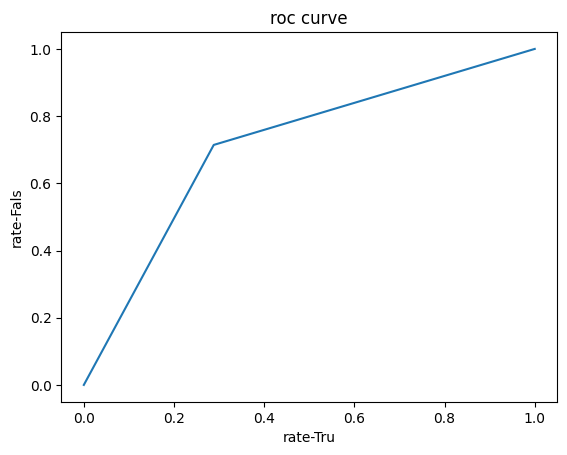

auc- curve: 0.7130750605326877


In [32]:
En_Offen_span_Fals, En_Offen_span_tre, En_Offen_span_ths = En_Offen_span_rc(En_Offen_span_1ye, En_Offen_span_pct)
En_Offen_span_mt.plot(En_Offen_span_Fals, En_Offen_span_tre)
En_Offen_span_mt.ylabel('rate-Fals')
En_Offen_span_mt.xlabel('rate-Tru')
En_Offen_span_mt.title('roc curve')
En_Offen_span_mt.show()
print('auc- curve:', En_Offen_span_ac(En_Offen_span_1ye, En_Offen_span_pct))

#### XGBoost

In [33]:
from xgboost import XGBClassifier as En_Offen_span_1etg

En_Hypm = { 'n_estimators': [20,40,60,80],
               'subsample': [0.01,0.04,0.06,0.09],
               'learning_rate':[0.1,0.3,0.5,0.7]}


En_Hypm_vsb = En_Offen_span_1etg(random_state= En_rast)
En_Hypm_vsb = En_Offen_span_1grdsh(En_Hypm_vsb, En_Hypm,
                          cv=2, verbose=10)
En_Hypm_vsb.fit(En_Offen_span_1xr[:500], En_Offen_span_1yr[:500])

print(En_Hypm_vsb.best_params_)
print("score-En_Offen_span_1: ", En_Hypm_vsb.best_score_)

Fitting 2 folds for each of 64 candidates, totalling 128 fits
[CV 1/2; 1/64] START learning_rate=0.1, n_estimators=20, subsample=0.01.........
[CV 1/2; 1/64] END learning_rate=0.1, n_estimators=20, subsample=0.01;, score=0.496 total time=   1.2s
[CV 2/2; 1/64] START learning_rate=0.1, n_estimators=20, subsample=0.01.........
[CV 2/2; 1/64] END learning_rate=0.1, n_estimators=20, subsample=0.01;, score=0.500 total time=   1.0s
[CV 1/2; 2/64] START learning_rate=0.1, n_estimators=20, subsample=0.04.........
[CV 1/2; 2/64] END learning_rate=0.1, n_estimators=20, subsample=0.04;, score=0.496 total time=   1.0s
[CV 2/2; 2/64] START learning_rate=0.1, n_estimators=20, subsample=0.04.........
[CV 2/2; 2/64] END learning_rate=0.1, n_estimators=20, subsample=0.04;, score=0.500 total time=   1.0s
[CV 1/2; 3/64] START learning_rate=0.1, n_estimators=20, subsample=0.06.........
[CV 1/2; 3/64] END learning_rate=0.1, n_estimators=20, subsample=0.06;, score=0.496 total time=   1.0s
[CV 2/2; 3/64] STA


 training duration: 4.207855701446533 

              precision    recall  f1-score   support

         0.0       0.68      0.79      0.73       127
         1.0       0.72      0.59      0.64       116

    accuracy                           0.69       243
   macro avg       0.70      0.69      0.69       243
weighted avg       0.69      0.69      0.69       243


 validation duration: 0.08825969696044922 



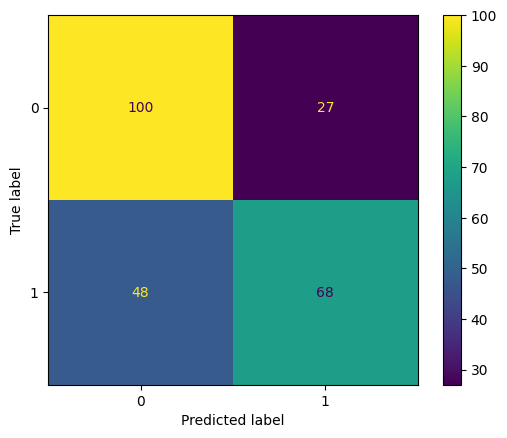

In [34]:
En_pd1 = En_Offen_span_1tiim.time()

En_Offen_span_MdE= En_Offen_span_1etg(**En_Hypm_vsb.best_params_)
En_Offen_span_MdE.fit(En_Offen_span_1xr, En_Offen_span_1yr)

En_pd2 = En_Offen_span_1tiim.time()
print("\n training duration:", En_pd2-En_pd1,"\n")


En_pd1 = En_Offen_span_1tiim.time()

En_Offen_span_pct= En_Offen_span_MdE.predict(En_Offen_span_1xd)

print(En_Offen_span_1cffr(En_Offen_span_1yd, En_Offen_span_pct))

En_tk = En_Offen_span_1cfmt(En_Offen_span_1yd,En_Offen_span_pct)
En_rd = En_Offen_span_1cmxd(confusion_matrix = En_tk, display_labels = [0,1])
En_rd.plot()

En_pd2= En_Offen_span_1tiim.time()
print("\n validation duration:", En_pd2-En_pd1,"\n")

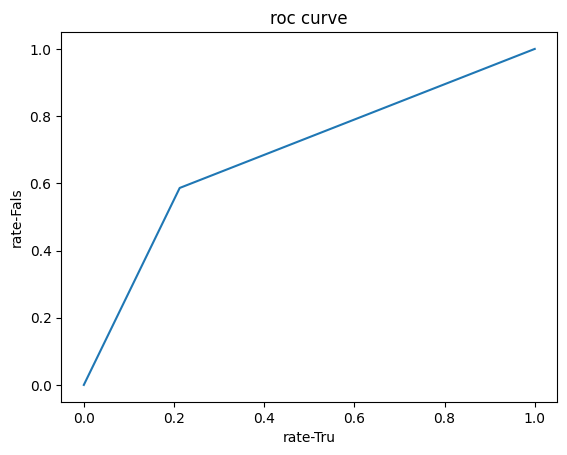

auc- curve: 0.6868042356774368


In [35]:
En_Offen_span_Fals, En_Offen_span_tre, En_Offen_span_ths = En_Offen_span_rc(En_Offen_span_1yd, En_Offen_span_pct)
En_Offen_span_mt.plot(En_Offen_span_Fals, En_Offen_span_tre)
En_Offen_span_mt.ylabel('rate-Fals')
En_Offen_span_mt.xlabel('rate-Tru')
En_Offen_span_mt.title('roc curve')
En_Offen_span_mt.show()
print('auc- curve:', En_Offen_span_ac(En_Offen_span_1yd, En_Offen_span_pct))

              precision    recall  f1-score   support

         0.0       0.59      0.64      0.62       118
         1.0       0.64      0.59      0.61       126

    accuracy                           0.61       244
   macro avg       0.62      0.62      0.61       244
weighted avg       0.62      0.61      0.61       244


 testing duration: 0.0914468765258789 



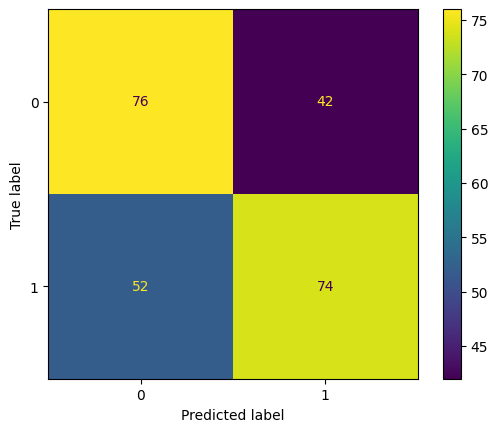

In [36]:
En_pd1 = En_Offen_span_1tiim.time()

En_Offen_span_pct= En_Offen_span_MdE.predict(En_Offen_span_1xe)

print(En_Offen_span_1cffr(En_Offen_span_1ye, En_Offen_span_pct))

En_tk = En_Offen_span_1cfmt(En_Offen_span_1ye,En_Offen_span_pct)
En_rd = En_Offen_span_1cmxd(confusion_matrix = En_tk, display_labels = [0,1])
En_rd.plot()

En_pd2= En_Offen_span_1tiim.time()
print("\n testing duration:", En_pd2-En_pd1,"\n")

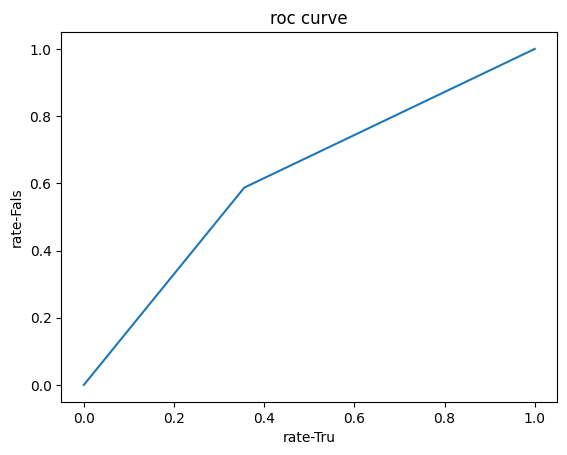

auc- curve: 0.6156846919558785


In [37]:
En_Offen_span_Fals, En_Offen_span_tre, En_Offen_span_ths = En_Offen_span_rc(En_Offen_span_1ye, En_Offen_span_pct)
En_Offen_span_mt.plot(En_Offen_span_Fals, En_Offen_span_tre)
En_Offen_span_mt.ylabel('rate-Fals')
En_Offen_span_mt.xlabel('rate-Tru')
En_Offen_span_mt.title('roc curve')
En_Offen_span_mt.show()
print('auc- curve:', En_Offen_span_ac(En_Offen_span_1ye, En_Offen_span_pct))